**Pedotransfer Function**

Pedotransfer functions crate a relation for the soil model based on some measurements of a soil sample. There are different pedotransfers functions available that give a relation for different soil models, e.g. Genuchten or Brooks(-Corey). 

In [1]:
import pedon as pe
import matplotlib.pyplot as plt

In [2]:
# create soil sample
sand_p = 50  # sand [%]
silt_p = 10  # silt [%]
clay_p = 30  # clay [%]
rho = 1.5  # bulk density [g/cm3]
om_p = 10  # organic matter [%]
m50 = 150  # median sand fraction [um]
ts = False  # topsoil boolean

ss = pe.SoilSample(
    sand_p=sand_p, silt_p=silt_p, clay_p=clay_p, rho=rho, om_p=om_p, m50=m50
)

In [3]:
# wosten pedotransfer function (van Genuchten)
wos = ss.wosten(ts=ts)

# wosten pedotransfer function for sand (van Genuchten)
woss = ss.wosten_sand(ts=ts)

# wosten pedotransfer function for clay (van Genuchten)
wosc = ss.wosten_clay()

# cosby pedotransfer function (Brook-Corey)
cosb = ss.cosby()

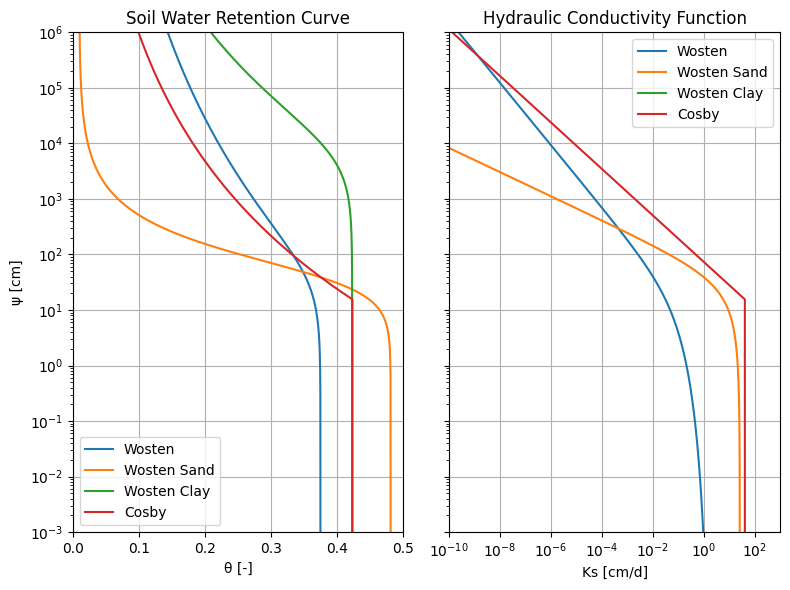

In [4]:
# More extensive plot method
f, axs = plt.subplots(1, 2, figsize=(8, 6), sharey=True)

pe.plot_swrc(wos, ax=axs[0], label="Wosten")
pe.plot_swrc(woss, ax=axs[0], label="Wosten Sand")
pe.plot_swrc(wosc, ax=axs[0], label="Wosten Clay")
pe.plot_swrc(cosb, ax=axs[0], label="Cosby")

axs[0].legend()
axs[0].set_yscale("log")
axs[0].set_ylabel("\N{GREEK SMALL LETTER PSI} [cm]")
axs[0].set_title("Soil Water Retention Curve")
axs[0].set_xlabel("\N{GREEK SMALL LETTER THETA} [-]")
axs[0].set_xlim(0, 0.5)


pe.plot_hcf(wos, ax=axs[1], label="Wosten")
pe.plot_hcf(woss, ax=axs[1], label="Wosten Sand")
pe.plot_hcf(wosc, ax=axs[1], label="Wosten Clay")
pe.plot_hcf(cosb, ax=axs[1], label="Cosby")

axs[1].legend()
axs[1].set_yscale("log")
axs[1].set_title("Hydraulic Conductivity Function")
axs[1].set_xlabel("Ks [cm/d]")
axs[1].set_xscale("log")
axs[1].set_xlim(1e-10, 1e3)

f.tight_layout()